## **K-Nearest Neighbors from Scratch**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

The `KNN` class implements the following key functionality:
- Initialize with a configurable number of neighbors (k)
- Store training data
- Calculate Euclidean distances
- Predict class labels using majority voting

## Key Parameters

- `k` (default=3): The number of neighbors to consider when making predictions. This can be adjusted based on your specific use case:
  - Smaller k: More sensitive to local patterns, may overfit
  - Larger k: Smoother decision boundaries, may underfit

## Main Methods

1. `fit(X, y)`:
   - Stores the training data and labels
   - Parameters:
     - `X`: Training features (shape: n_samples × n_features)
     - `y`: Training labels (shape: n_samples)

2. `predict(X)`:
   - Predicts class labels for new samples
   - Uses Euclidean distance to find k-nearest neighbors
   - Determines final class through majority voting
   - Parameters:
     - `X`: Test features to predict (shape: n_samples × n_features)

## Helper Methods

1. `euclidean_distance(x1, x2)`:
   - Calculates the Euclidean distance between two points

2. `majority_vote(labels)`:
   - Implements custom majority voting logic
   - Returns the most common label among k-nearest neighbors


In [5]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """
        Store the training data for later use during prediction
        
        Parameters:
        X : array-like of shape (n_samples, n_features)
        y : array-like of shape (n_samples,)
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    
    def euclidean_distance(self, x1, x2):
        """Calculate euclidean distance between two points"""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def majority_vote(self, labels):
        """
        Custom implementation of majority vote without using Collections.Counter
        
        Parameters:
        labels : array-like of class labels
        
        Returns:
        most_common_label : the most frequent label
        """
        unique_labels = np.unique(labels)
        label_counts = np.zeros(len(unique_labels))
        
        for i, label in enumerate(unique_labels):
            label_counts[i] = np.sum(labels == label)
        
        return unique_labels[np.argmax(label_counts)]
    
    def predict(self, X):
        """
        Predict class labels for samples in X
        
        Parameters:
        X : array-like of shape (n_samples, n_features)
        
        Returns:
        y : array-like of shape (n_samples,)
        """
        X = np.array(X)
        predictions = []
        
        for x in X:
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            
            k_indices = np.argsort(distances)[:self.k]
            
            k_nearest_labels = self.y_train[k_indices]
            
            predictions.append(self.majority_vote(k_nearest_labels))
        
        return np.array(predictions)

`find_optimal_k` determines the best k value by:
- Testing a range of k values
- Calculating error rates and accuracies
- Visualizing performance metrics
- Using the elbow method to find the optimal point

### Parameters

1. `X_train`: Training feature array
2. `X_test`: Test feature array
3. `y_train`: Training labels array
4. `y_test`: Test labels array
5. `k_range`: (Optional) Custom range of k values to test
  - If not provided, defaults to range from 1 to √n_samples

### Key Components

1. **Performance Metrics Tracking**:
  - Training error rate
  - Test error rate
  - Training accuracy
  - Test accuracy

2. **Visualization**:
  - Creates two subplots:
    - Error rates vs k value
    - Accuracy vs k value
  - Includes vertical line indicating optimal k

### Method Details

- Uses the elbow method to find optimal k:
 - Calculates differences in error rates
 - Finds the point where error reduction stabilizes
 - Identifies this as the optimal k value


In [8]:
def find_optimal_k(X_train, X_test, y_train, y_test, k_range=None):
    """
    Find optimal k using the elbow method
    
    Parameters:
    X_train, X_test : Training and test feature arrays
    y_train, y_test : Training and test label arrays
    k_range : Range of k values to test (default: 1 to sqrt(n_samples))
    
    Returns:
    optimal_k : Optimal value of k
    error_rates : Dictionary containing error rates for each k
    """
    if k_range is None:
        k_max = int(np.sqrt(len(X_train)))
        k_range = range(1, k_max + 1)
    
    error_rates = {
        'train_error': [],
        'test_error': [],
        'train_accuracy': [],
        'test_accuracy': []
    }
    
    for k in k_range:
        knn = KNN(k=k)
        knn.fit(X_train, y_train)
        
        train_predictions = knn.predict(X_train)
        test_predictions = knn.predict(X_test)
        
        train_error = np.mean(train_predictions != y_train)
        test_error = np.mean(test_predictions != y_test)
        train_accuracy = 1 - train_error
        test_accuracy = 1 - test_error
        
        error_rates['train_error'].append(train_error)
        error_rates['test_error'].append(test_error)
        error_rates['train_accuracy'].append(train_accuracy)
        error_rates['test_accuracy'].append(test_accuracy)
    
    test_errors = np.array(error_rates['test_error'])
    
    error_diffs = np.diff(test_errors)
    
    elbow_idx = np.argmin(np.abs(error_diffs - np.mean(error_diffs))) + 1
    optimal_k = k_range[elbow_idx]
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(k_range, error_rates['train_error'], 'b-', label='Training Error')
    plt.plot(k_range, error_rates['test_error'], 'r-', label='Test Error')
    plt.axvline(x=optimal_k, color='g', linestyle='--', label=f'Optimal k = {optimal_k}')
    plt.xlabel('k Value')
    plt.ylabel('Error Rate')
    plt.title('Error Rates vs k Value')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(k_range, error_rates['train_accuracy'], 'b-', label='Training Accuracy')
    plt.plot(k_range, error_rates['test_accuracy'], 'r-', label='Test Accuracy')
    plt.axvline(x=optimal_k, color='g', linestyle='--', label=f'Optimal k = {optimal_k}')
    plt.xlabel('k Value')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs k Value')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return optimal_k, error_rates

A suite of functions that creates synthetic 2D datasets with customizable geometric patterns (Gaussian, Circle, Spiral, or Moon shapes) and multiple classes, ideal for testing and visualizing the classifier's performance on different data distributions.

In [11]:
def generate_pattern(pattern_type, n_samples, center, scale=1.0, noise_level=0.2):
    """
    Generate different patterns for classes
    
    Parameters:
    pattern_type : int (0: Gaussian, 1: Circle, 2: Spiral, 3: Moons)
    n_samples : int
    center : array-like, center coordinates
    scale : float, scaling factor
    noise_level : float, amount of noise to add
    """
    if pattern_type == 0:  # Gaussian cluster
        return (np.random.randn(n_samples, 2) * scale * 0.5 + center + 
                np.random.randn(n_samples, 2) * noise_level)
    
    elif pattern_type == 1:  # Circle
        theta = np.random.uniform(0, 2*np.pi, n_samples)
        radius = np.random.normal(2 * scale, 0.3 * scale, n_samples)
        points = np.column_stack([
            radius * np.cos(theta),
            radius * np.sin(theta)
        ])
        return points + center + np.random.randn(n_samples, 2) * noise_level
    
    elif pattern_type == 2:  
        theta = np.linspace(0, 4*np.pi, n_samples)
        radius = np.linspace(0.5, 2 * scale, n_samples)
        points = np.column_stack([
            radius * np.cos(theta),
            radius * np.sin(theta)
        ])
        return points + center + np.random.randn(n_samples, 2) * noise_level
    
    else:  
        t = np.linspace(0, np.pi, n_samples)
        points = np.column_stack([
            np.cos(t) * scale,
            np.sin(t) * scale
        ])
        moon_shift = np.random.uniform(-0.5, 0.5, 2)
        return points + center + moon_shift + np.random.randn(n_samples, 2) * noise_level

def generate_data(n_samples=300, n_classes=3):
    """
    Generate complex synthetic data with specified number of classes
    
    Parameters:
    n_samples : int, total number of samples
    n_classes : int, number of classes to generate
    
    Returns:
    X : array-like of shape (n_samples, 2)
    y : array-like of shape (n_samples,)
    """
    n_samples_per_class = n_samples // n_classes
    
    radius = 4
    angles = np.linspace(0, 2*np.pi, n_classes, endpoint=False)
    centers = radius * np.column_stack([np.cos(angles), np.sin(angles)])
    
    X_list = []
    y_list = []
    
    for i in range(n_classes):
        pattern_type = np.random.randint(0, 4)
        scale = np.random.uniform(0.8, 1.2)
        noise_level = np.random.uniform(0.1, 0.3)
        
        X_class = generate_pattern(
            pattern_type=pattern_type,
            n_samples=n_samples_per_class,
            center=centers[i],
            scale=scale,
            noise_level=noise_level
        )
        
        X_list.append(X_class)
        y_list.append(np.full(n_samples_per_class, i))
    
    X = np.vstack(X_list)
    y = np.hstack(y_list)
    
    noise_points = np.random.uniform(-6, 6, (n_samples // 10, 2))
    noise_labels = np.random.randint(0, n_classes, n_samples // 10)
    
    X = np.vstack([X, noise_points])
    y = np.hstack([y, noise_labels])
    
    shuffle_idx = np.random.permutation(len(X))
    X = X[shuffle_idx]
    y = y[shuffle_idx]
    
    return X, y

In [13]:
def plot_results(X_train, X_test, y_train, y_test, predictions, n_classes):
    """
    Create three subplots showing raw data, true classes, and predictions
    
    Parameters:
    X_train, X_test : Training and test feature arrays
    y_train, y_test : Training and test label arrays
    predictions : Predicted labels for test data
    n_classes : Number of classes in the dataset
    """
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    colors = plt.cm.rainbow(np.linspace(0, 1, n_classes))
    
    X_full = np.vstack([X_train, X_test])
    
    axes[0].scatter(X_full[:, 0], X_full[:, 1], c='gray', alpha=0.5, label='All Data')
    axes[0].set_title('Raw Data')
    axes[0].grid(True)
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    
    for i in range(n_classes):
        mask_train = y_train == i
        axes[1].scatter(X_train[mask_train][:, 0], X_train[mask_train][:, 1],
                       c=[colors[i]], marker='o', label=f'Class {i} (Train)',
                       alpha=0.6)
        
        mask_test = y_test == i
        axes[1].scatter(X_test[mask_test][:, 0], X_test[mask_test][:, 1],
                       c=[colors[i]], marker='s', label=f'Class {i} (Test)',
                       alpha=0.6)
    
    axes[1].set_title('True Classes')
    axes[1].grid(True)
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    
    for i in range(n_classes):
        mask_train = y_train == i
        axes[2].scatter(X_train[mask_train][:, 0], X_train[mask_train][:, 1],
                       c=[colors[i]], marker='o', label=f'Class {i} (Train)',
                       alpha=0.3)
    
    for i in range(n_classes):
        mask_test = predictions == i
        axes[2].scatter(X_test[mask_test][:, 0], X_test[mask_test][:, 1],
                       c=[colors[i]], marker='s', label=f'Class {i} (Predicted)',
                       alpha=0.6)
    
    axes[2].set_title('Predictions')
    axes[2].grid(True)
    axes[2].set_xlabel('Feature 1')
    axes[2].set_ylabel('Feature 2')
    
    for ax in axes:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return fig

def print_classification_metrics(y_true, y_pred, class_labels=None):
    """
    Print comprehensive classification metrics
    
    Parameters:
    y_true : True labels
    y_pred : Predicted labels
    class_labels : List of class labels (optional)
    """
    if class_labels is None:
        class_labels = np.unique(y_true)
    
    n_classes = len(class_labels)
    
    conf_matrix = np.zeros((n_classes, n_classes))
    for i in range(len(y_true)):
        conf_matrix[int(y_true[i])][int(y_pred[i])] += 1
    
    precision = np.zeros(n_classes)
    recall = np.zeros(n_classes)
    f1_score = np.zeros(n_classes)
    
    for i in range(n_classes):
        tp = conf_matrix[i][i]
        fp = np.sum(conf_matrix[:, i]) - tp
        fn = np.sum(conf_matrix[i, :]) - tp
        
        precision[i] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall[i] = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) > 0 else 0
    
    accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1 = np.mean(f1_score)
    
    print("\n=== Classification Metrics ===")
    print(f"\nOverall Accuracy: {accuracy:.4f}")
    print(f"Macro-averaged Precision: {macro_precision:.4f}")
    print(f"Macro-averaged Recall: {macro_recall:.4f}")
    print(f"Macro-averaged F1-score: {macro_f1:.4f}")
    
    print("\nPer-class Metrics:")
    print("\nClass\t\tPrecision\tRecall\t\tF1-score")
    print("-" * 50)
    for i in range(n_classes):
        print(f"Class {i}\t\t{precision[i]:.4f}\t\t{recall[i]:.4f}\t\t{f1_score[i]:.4f}")
    
    print("\nConfusion Matrix:")
    print("\nPredicted →")
    print("Actual ↓")
    
    print("\t", end="")
    for i in range(n_classes):
        print(f"Class {i}\t", end="")
    print("\n" + "-" * (8 * n_classes + 8))
    
    for i in range(n_classes):
        print(f"Class {i}\t", end="")
        for j in range(n_classes):
            print(f"{int(conf_matrix[i][j])}\t", end="")
        print()

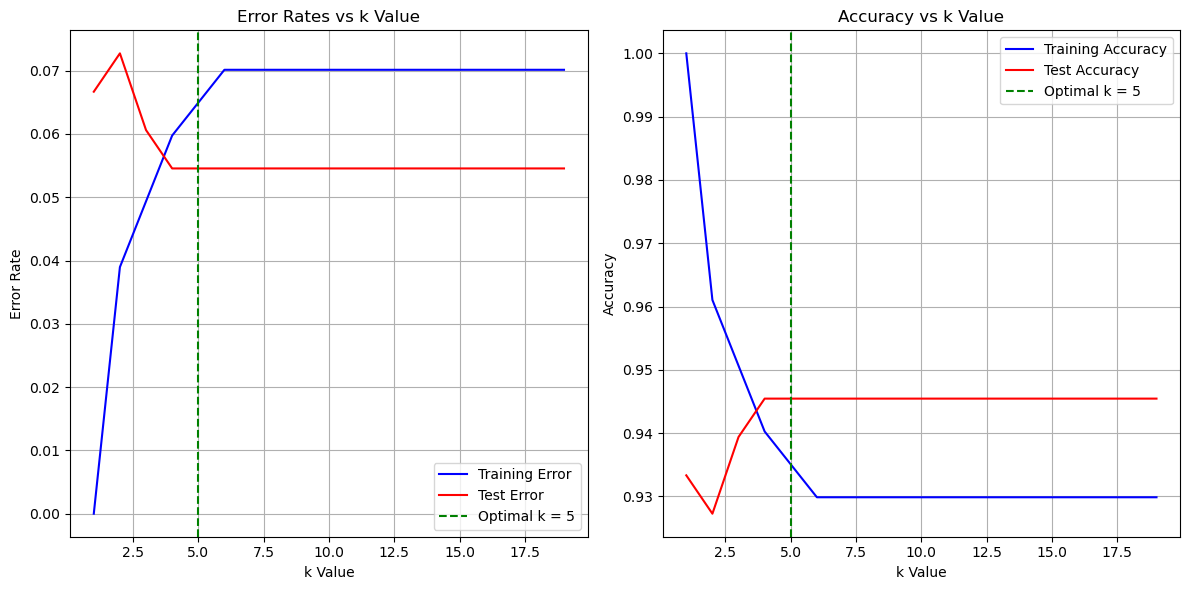


Optimal k value: 5

=== Classification Metrics ===

Overall Accuracy: 0.9455
Macro-averaged Precision: 0.9438
Macro-averaged Recall: 0.9471
Macro-averaged F1-score: 0.9447

Per-class Metrics:

Class		Precision	Recall		F1-score
--------------------------------------------------
Class 0		0.9706		0.9429		0.9565
Class 1		0.8621		0.9615		0.9091
Class 2		1.0000		1.0000		1.0000
Class 3		0.9375		0.8824		0.9091
Class 4		0.9487		0.9487		0.9487

Confusion Matrix:

Predicted →
Actual ↓
	Class 0	Class 1	Class 2	Class 3	Class 4	
------------------------------------------------
Class 0	33	1	0	1	0	
Class 1	0	25	0	0	1	
Class 2	0	0	31	0	0	
Class 3	0	3	0	30	1	
Class 4	1	0	0	1	37	


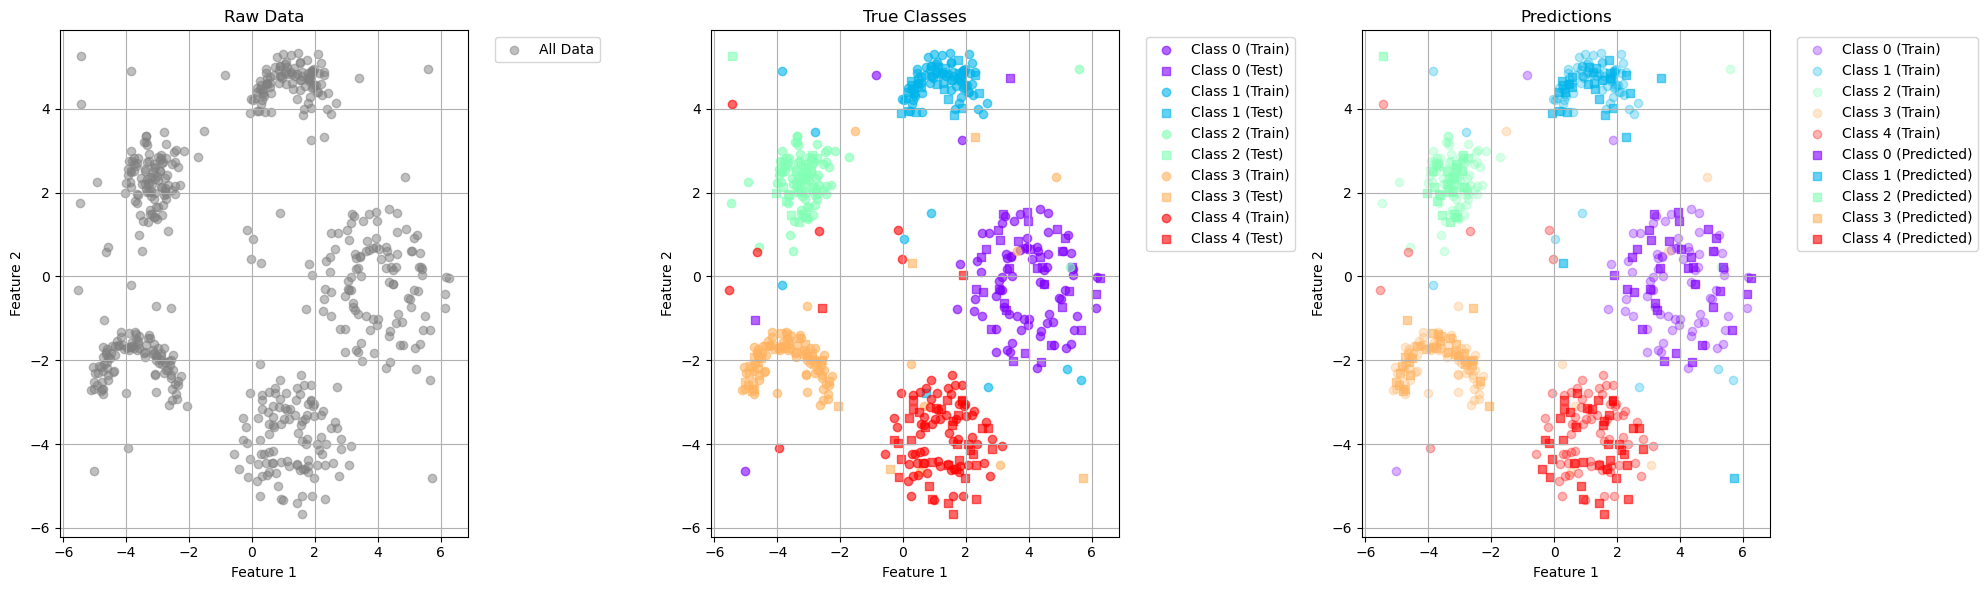

In [15]:
if __name__ == "__main__":
    N_CLASSES = 5
    
    X, y = generate_data(500, n_classes=N_CLASSES)
    
    indices = np.random.permutation(len(X))
    train_size = int(0.7 * len(X))
    
    X_train = X[indices[:train_size]]
    y_train = y[indices[:train_size]]
    X_test = X[indices[train_size:]]
    y_test = y[indices[train_size:]]
    
    optimal_k, error_rates = find_optimal_k(X_train, X_test, y_train, y_test)
    print(f"\nOptimal k value: {optimal_k}")
    
    knn = KNN(k=optimal_k)
    knn.fit(X_train, y_train)
    
    predictions = knn.predict(X_test)
    
    print_classification_metrics(y_test, predictions)
    
    fig = plot_results(X_train, X_test, y_train, y_test, predictions, N_CLASSES)
    
    accuracy = np.mean(predictions == y_test)
    plt.show()